In [206]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


In [37]:
# TODO: Minimum price of the data
#print data
minimum_price =  np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000
Maximum price: $1024800
Mean price: $454342.944785
Median price $438900.0
Standard deviation of prices: $165171.131544


In [ ]:
Question 1: I would expect the influence of features would have the following effect on home prices
    The higher the RM (number of rooms), the higher the home value--increase MDEV
    The higher the LSTAT (percent of lower class workers), the lower the home value--decrease MDEV
    The higher the PTRATIO (ratio of students to teachers), the lower the home value--decrease MDEV

In [207]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

In [208]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


In [47]:
Question 2: I would consider this model to have successfully captured the variation of the target variable 
because the R^2 value is closer to 1.

In [209]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices,test_size=0.20, random_state=42)

# Success
print("Training and testing split was successful.")


Training and testing split was successful.


In [ ]:
Question 3: Training allows the algorithm to predict the outcomes, the testing set will validate it.
    The ratio used will help with controlling underfitting and overfitting since insufficient data can
    cause underfitting and too much data can cause overfitting or not help with the predictions.  Test
    data will verify the solution.

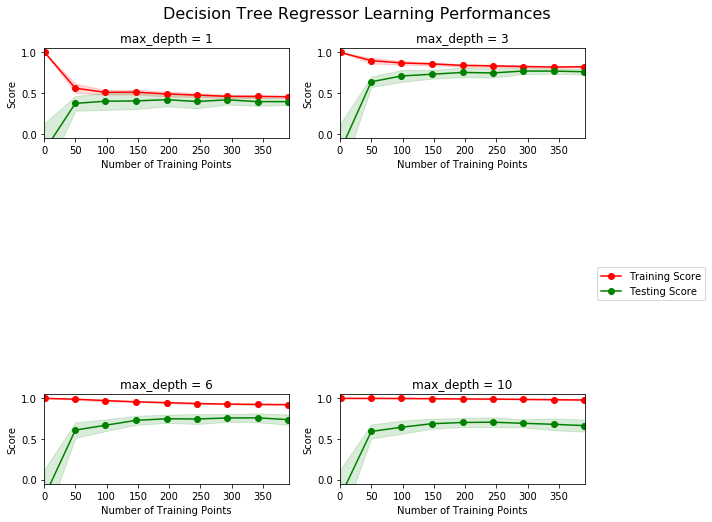

In [210]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

In [326]:
Question 4:  max_depth for the third model is 6.
    
    As more traing points are added, the training curve levels out.  The same is true for the testing score, the more
    that are added, the more the curve levels out.  
    
    It seems that adding more testing/training points would not have an impact on the success of the curves.  Adding 
    additonal points would just continue to show that (in the max_depth = 6 case) that we are past the ideal number
    of depth for this data.  It would add no value.  More training points were needed at the start to establish the
    curves, but once they level out, this is essentially done.

In [ ]:
Question 5:  When the depth is 1, the performance is showing high bias because the points between
    training and testing start apart and approach each other, but the error remains high.  As the max 
    depth continues to 3, the training and testing approach each other, but the score improves--this is
    better.  When the max depth increases to 6 the two lines start drifting apart and that is showing
    higher variance.  The variance increasing is even more clearly shown when the depth is increased to 10.  At
    10 it is high variance.

In [ ]:
Question 6:  From the above graphs, I can see the training improving as the depth gets larger and I see at depth 3 the
    testing score is close to the training.  I see the testing score improved at 6, but the training is showing 
    increased variance.  It think I would intuitively choose a depth = 4 to get improved training results, but
    not increase the variance.

In [ ]:
Question 7:  Grid search is a model hyperparameter optimization technique.  It will run training and testing scenarios 
    against vectors or arrays to find the best fit.  You manually will supply the type of training you want it to 
    apply and other parameters such as the way you want it to be scored, the characteristics of how you want it 
    to try...such as the depth of Decision tree.  Once the training is complete it will score its solution by 
    using the testing set and report the success of it.  You can change the variables in your training to 
    optimize the result.

In [165]:
Question 8:  K-fold cross-validation training technique is used to look at your data several different ways to 
    get the best fit.  The key is that the original data is randomly split across k number of equal sub-samples.  
    One sub-sample is kept as the testing set and the others are used as the training set.  The best solution is 
    calculated for each combination of training and the testing set.  The results are folded (averaged) into a 
    single-solution.  
    
    This is a benefit because it looks like there would be more data than we originally had because using this 
    technique we kept looking at the data in different ways.  Sometimes a single piece of data was in the 
    training set, other times it was in the testing set.  In grid search, it only looks at the data in one way.
    This cross-validation can help improve the accuracy of the result without overfitting or memorizing the data.
    

In [306]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    #cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)
    
    cv_sets = ShuffleSplit(n_splits=10, test_size=0.2, train_size=None, random_state=0)
    cv_sets.get_n_splits(X.shape[0])
    
    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params =  {'max_depth':[1,2,3,4,5,6,7,8,9,10]}
    
    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer'
    scoring_fnc = make_scorer(score_func=performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    
    grid = GridSearchCV(estimator=regressor,param_grid=params, scoring=scoring_fnc,cv=cv_sets.get_n_splits(X.shape[0]))

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X,y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [308]:
# Fit the training data to the model using grid search

reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


In [ ]:
#Question 9:The fit_model recommended a depth of 4.  It is the same as I intuitively chose in question #6.

In [312]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


In [ ]:
Question 10:  Using just the three factors to determine home price doesn't necessarily mean that it will generate 
    the correct predictions.  But that being said, Client #1 has 5 bedrooms, some poverty level and a more average
    school.  The mean price in the database is $454,342.  Because of the school and poverty level, you would expect 
    this to be below the mean price, so $403,025.00 is a reasonable number.  Client #2 has 4 bedrooms and signficant
    poverty level and a poor student-teacher ratio.  You would expect this number to be far less than the mean,
    and the prediction is in the correct direction.  A starting estimate of $237,478.72 is a reasonable number to
    start with.  For Client #3, they have a large 8 bedroom home in a high income area with an excellent student-
    teacher ratio.  The maximum price in the database is $1,024,800 and this is predicting $931,636.36 which is well 
    above the mean or median price and more than 2 std dev. off of the mean.  However when you double-check against 
    similar homes on this basis (these features), the prediction is reasonable.
    
    Any of these numbers can change if other factors were added, such as condition of the home, number of bathrooms,
    etc.  Also the initial values for homes are based on old data with an inflation factor.  If more recent 
    numbers were used the selling prices used in the database could be much different.

In [310]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $29,438.89


In [ ]:
Question 11: I would not recommend using this as the model in a real-world setting.  This data is based on
    40 year old data.  Even though an inflation factor impacted the prices, it cannot account for changing neighborhoods,
    and changing tastes of today's buyers.  Inflation is only a piece of how the prices have been impacted.
    The projections are based on three pieces of data that may be important to buyers, however, it is more 
    likely that several other features need to be considered in determining a final price.  Other factors such as
    quality of appliances would be a help to predict the final amount, however, there needs to be others as well,
    such as number of bathrooms.  There needs to be many more features included to make a good prediction.  
    
    The model isn't robust enough to be consistent.  Note with all of these 10 trials is the large range in prices.  
    It shows that there isn't sufficient data to be confident of its prediction.
    
    Data collected in a rural city vs. Boston would be different.  The buyers in a rural city would most likely
    have different features that they are interested in, although there would still be many common features.  
    The range of the prices would be different between the two places since neighborhood is a large factor in
    home value.
    
    It is fair to judge the price of an individual home based on the neighborhood and it has been done that 
    way.  You may translate "neighborhood" to be many features, such as parks, water, weather, sidewalks, 
    visual appeal, safety, language, age, public transportation, police, utilities and many other things.  But
    all those figure into what makes up a neighborhood.